In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# !rm ds-abandono.xls
# !wget https://github.com/bdm-unlu/2020/raw/master/TPs/TP05/TP0502/ds-abandono.xls

In [2]:
data = pd.read_excel("ds-abandono.xls")
data.head()
cols = ["horas_trabajadas","anios_en_unlu","anios_cursados","c_promociones_1er_anio","c_libres_1er_anio","c_regulares_1er_anio","c_ausentes_1er_anio","fracaso_academico"]
reduced = data[cols]
reduced['anios_en_unlu'] = reduced['anios_en_unlu'].fillna(0)
scaled = scale(reduced)

/home/lucas/git/BDM-final/ML/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Copy-paste de la notebook de abandono para hacer separado la parte de jerarquico.

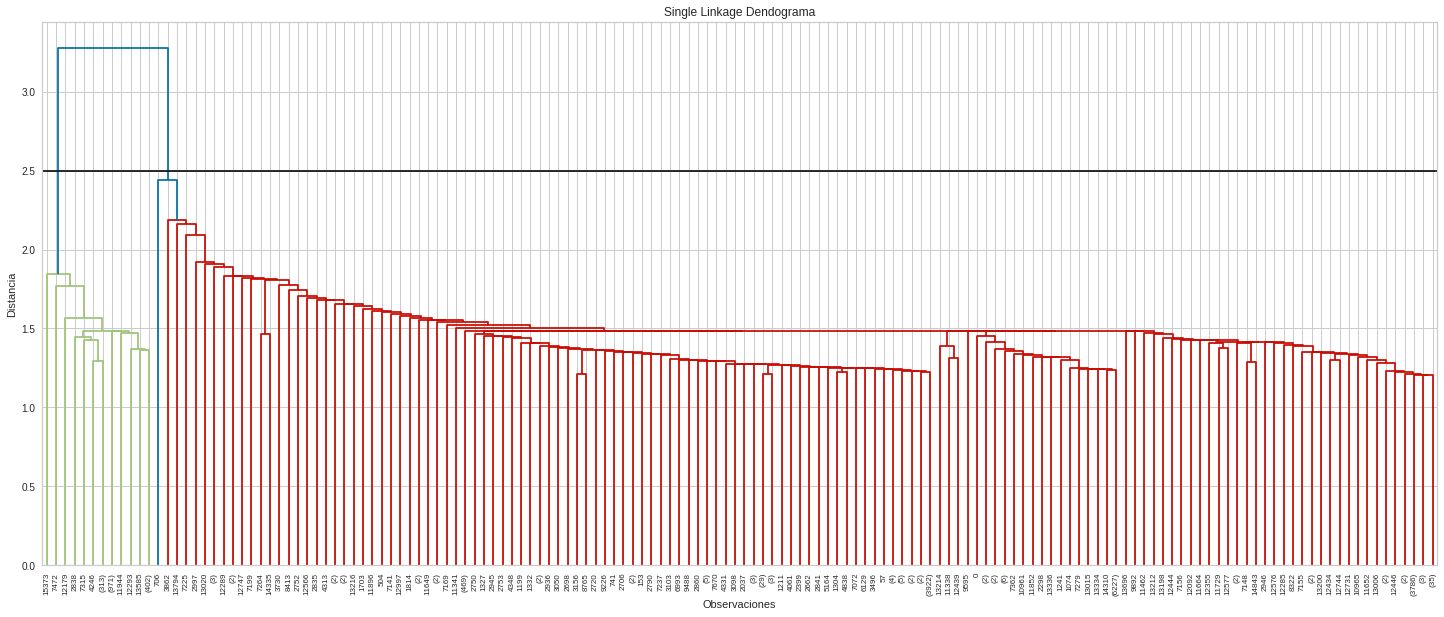

In [7]:
H = linkage(scaled, 'single')
max_d = 2.5
plt.figure(figsize=(25, 10))
plt.title('Single Linkage Dendograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

Con este grafico se ve facilemente que 2 clusters es buena opcion que ya hay una diferencia muy grande entre el verde y el rojo.
Ya que use single linkage las ramas estan muy pegadas y dificulta visualmente identificar.
Entiendo que usando otro tipo de Linkage tendre mejores resultados.

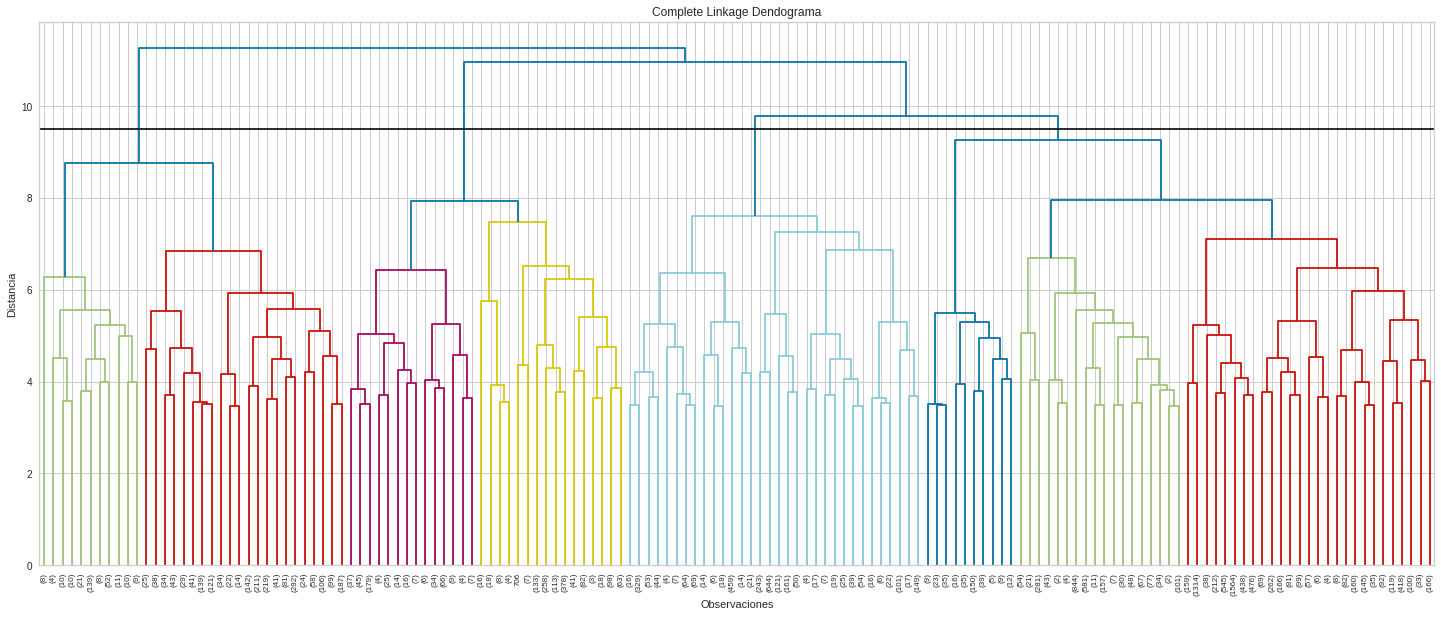

In [19]:
H = linkage(scaled, 'complete')
max_d = 10
plt.figure(figsize=(25, 10))
plt.title('Complete Linkage Dendograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

En cambio con Complete linkage puedo hacer un buen corte en 3, podria bajar hasta una distancia de 9.5 para obtener 4 clusters tambien, o 9 para 5 clusters pero mas no.
Tambien permite identificar mejor sub-grupos dentro de los clusters

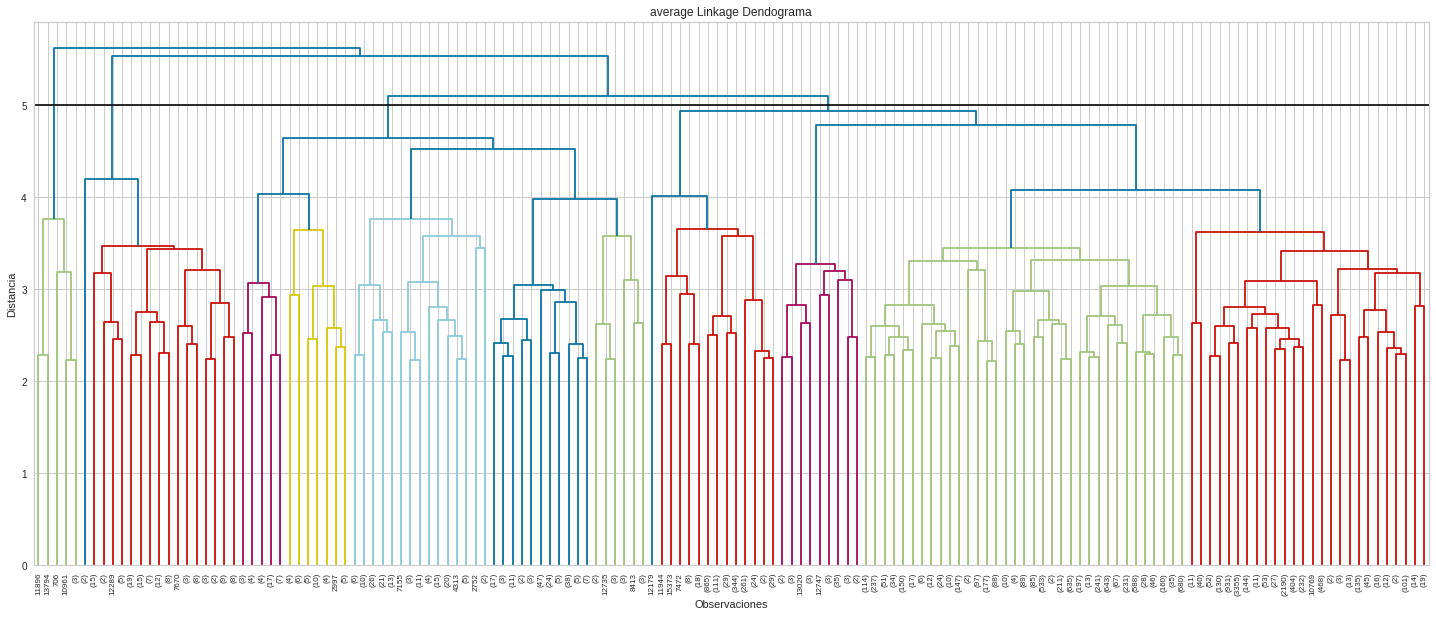

In [18]:
H = linkage(scaled, 'average')
max_d = 5
plt.figure(figsize=(25, 10))
plt.title('average Linkage Dendograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, truncate_mode='lastp',
    p=150, leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

En el caso de average cortatia en distance = 5, esto me daria 4 clusters.
Si tomara una distancia mas chica tendria varios clustes ya que en las distnacias entre 5 y 4 hay 6 uniones de clusters por lo que pasaria a tener cerca de 10.

Recordando los coeficientes de siluetas:
For n_clusters =2 silhouette score is 0.2711685745419997
For n_clusters =3 silhouette score is 0.3236244109434642
For n_clusters =4 silhouette score is 0.2573397678036564
For n_clusters =5 silhouette score is 0.24790443941350682

Creo que la mejor solucion se ve en el dendograa por Complete linkage en el que 3 clusters son facilmente dividibles mientras que en los otros casos es mas dificil hacer las divisiones, en especial en simple linkage.